<a href="https://colab.research.google.com/github/rajjjxd/ML-Tutorials/blob/main/Numerical_Data_%7C_Simple_Imputer_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score



In [ ]:
df = pd.read_csv('titanic_toy.csv')
df.head()

,Age,Fare,Family,Survived
0,22.0,7.2500,1,0
1,38.0,71.2833,1,1
2,26.0,7.9250,0,1
3,35.0,53.1000,1,1
4,35.0,8.0500,0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       714 non-null    float64
 1   Fare      846 non-null    float64
 2   Family    891 non-null    int64  
 3   Survived  891 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 28.0 KB


In [ ]:
df.isnull().mean()*100

Age         19.865320
Fare         5.050505
Family       0.000000
Survived     0.000000
dtype: float64

In [ ]:
#we apply mean to fare only, because Age has more than 5% missing values

In [ ]:
X = df.drop(columns=['Survived'])
y = df['Survived']

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)


In [ ]:
X_train.shape, X_test.shape


((712, 3), (179, 3))

In [ ]:
X_train.isnull().mean()*100


Age       20.786517
Fare       5.056180
Family     0.000000
dtype: float64

In [ ]:
X_test.isnull().mean()*100

Age       16.201117
Fare       5.027933
Family     0.000000
dtype: float64

In [ ]:
mean_fare = X_train['Fare'].mean()
median_fare = X_train['Fare'].median()


In [ ]:
X_train['Fare_median'] = X_train['Fare'].fillna(median_fare)
X_train['Fare_mean'] = X_train['Fare'].fillna(mean_fare)

In [ ]:
X_train.sample(20)

,Age,Fare,Family,Fare_median,Fare_mean
879,56.0,83.1583,1,83.1583,83.158300
799,30.0,24.1500,2,24.1500,24.150000
571,53.0,51.4792,2,51.4792,51.479200
872,33.0,5.0000,0,5.0000,5.000000
580,25.0,30.0000,2,30.0000,30.000000
715,19.0,7.6500,0,7.6500,7.650000
680,NaN,8.1375,0,8.1375,8.137500
213,30.0,13.0000,0,13.0000,13.000000
366,60.0,75.2500,1,75.2500,75.250000
283,19.0,8.0500,0,8.0500,8.050000


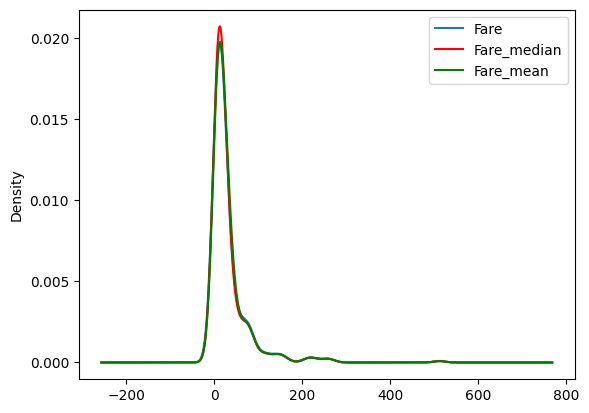

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original variable distribution
X_train['Fare'].plot(kind='kde', ax=ax)

# variable imputed with the median
X_train['Fare_median'].plot(kind='kde', ax=ax, color='red')

# variable imputed with the mean
X_train['Fare_mean'].plot(kind='kde', ax=ax, color='green')

# add legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

In [ ]:
X_train.cov()

,Age,Fare,Family,Fare_median,Fare_mean
Age,204.349513,70.719262,-6.498901,64.858859,66.665205
Fare,70.719262,2448.197914,17.258917,2448.197914,2448.197914
Family,-6.498901,17.258917,2.735252,16.476305,16.385048
Fare_median,64.858859,2448.197914,16.476305,2340.091022,2324.238526
Fare_mean,66.665205,2448.197914,16.385048,2324.238526,2324.238526


In [ ]:
X_train.corr()

,Age,Fare,Family,Fare_median,Fare_mean
Age,1.000000,0.092644,-0.299113,0.087356,0.090156
Fare,0.092644,1.000000,0.208268,1.000000,1.000000
Family,-0.299113,0.208268,1.000000,0.205942,0.205499
Fare_median,0.087356,1.000000,0.205942,1.000000,0.996607
Fare_mean,0.090156,1.000000,0.205499,0.996607,1.000000


<Axes: >

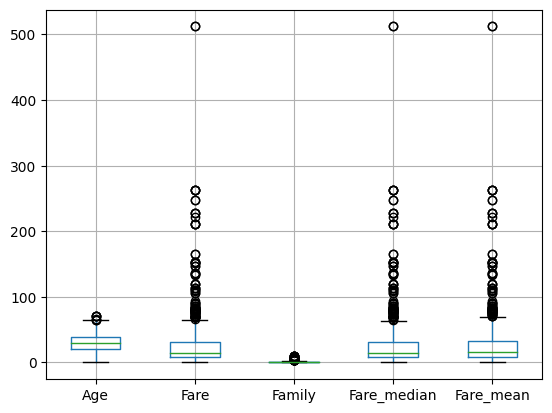

In [ ]:
X_train.boxplot()

<Axes: >

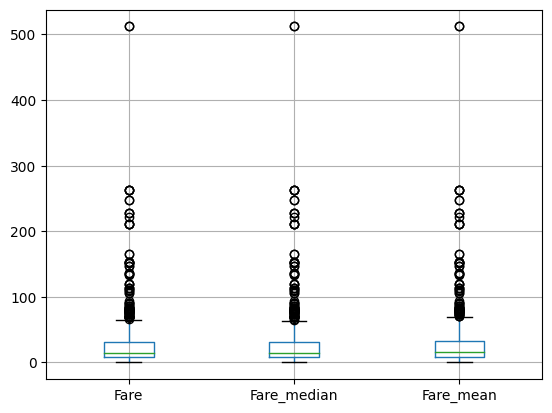

In [ ]:
X_train[['Fare', 'Fare_median', 'Fare_mean']].boxplot()

In [ ]:
df

,Age,Fare,Family,Survived
0,22.0,7.2500,1,0
1,38.0,71.2833,1,1
2,26.0,7.9250,0,1
3,35.0,53.1000,1,1
4,35.0,8.0500,0,0
...,...,...,...,...
886,27.0,13.0000,0,0
887,19.0,30.0000,0,1
888,NaN,23.4500,3,0
889,26.0,NaN,0,1


USING SKLEARN

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)


In [ ]:
imputer1 = SimpleImputer(strategy='median')
imputer2 = SimpleImputer(strategy='mean')

In [ ]:
trf = ColumnTransformer([
    ('imputer1',imputer1,['Age']),
    ('imputer2',imputer2,['Fare'])
],remainder='passthrough')

In [ ]:
trf.fit(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('imputer1', SimpleImputer(strategy='median'),
                                 ['Age']),
                                ('imputer2', SimpleImputer(), ['Fare'])])

In [ ]:
#median of imp 1
trf.named_transformers_['imputer1'].statistics_

array([28.])

In [ ]:
#mean of imp 2
trf.named_transformers_['imputer2'].statistics_

array([30.93426294])

In [ ]:
X_train = trf.transform(X_train)
X_test = trf.transform(X_test)

,Age,Fare,Family
0,22.0,7.2500,1
1,38.0,71.2833,1
2,26.0,7.9250,0
3,35.0,53.1000,1
4,35.0,8.0500,0
...,...,...,...
886,27.0,13.0000,0
887,19.0,30.0000,0
888,NaN,23.4500,3
889,26.0,NaN,0


In [ ]:
# prompt: how to add my fare_mean and fare _median coloumns in my dataframe

df['Fare_mean'] = X_train['Fare_mean']
df['Fare_median'] = X_train['Fare_median']
df.head()


KeyError: 'Fare_mean'

In [ ]:
#########

#In arbitrary value imputation,we fill na missing values with 99 or -1

In [ ]:
lr = LinearRegression()

lr.fit(X_train,y_train)

y_pred = lr.predict(X_test)

r2_score(y_test,y_pred)


ValueError: Input X contains NaN.
LinearRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values